#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 11
### Due: Monday, Apr 18th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Apr 18th.

---

## Problem 1


This problem has to do with density estimation and clustering. 

1. Read in `hw11_data.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


### Solution

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from astroML.density_estimation import KNeighborsDensity

Dataset Size: (1000, 3)


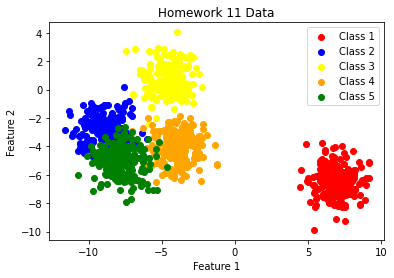

In [67]:
# Step 1
# Read in data

data = np.load('hw11_data.npy')
print('Dataset Size:', data.shape)

# Make a 2D scatter plot of data colored by labels
for i, color in enumerate(['red', 'blue', 'yellow', 'orange', 'green']):
    mask = data[data[:,2] == i]
    x = mask[:,0]
    y = mask[:,1]
    plt.scatter(x, y, c=color, label=f'Class {i+1}')
    
plt.title('Homework 11 Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Best bandwidth for Feature 1:
 {'bandwidth': 0.28620689655172415} 

Best bandwidth for Feature 2:
 {'bandwidth': 0.4724137931034482} 



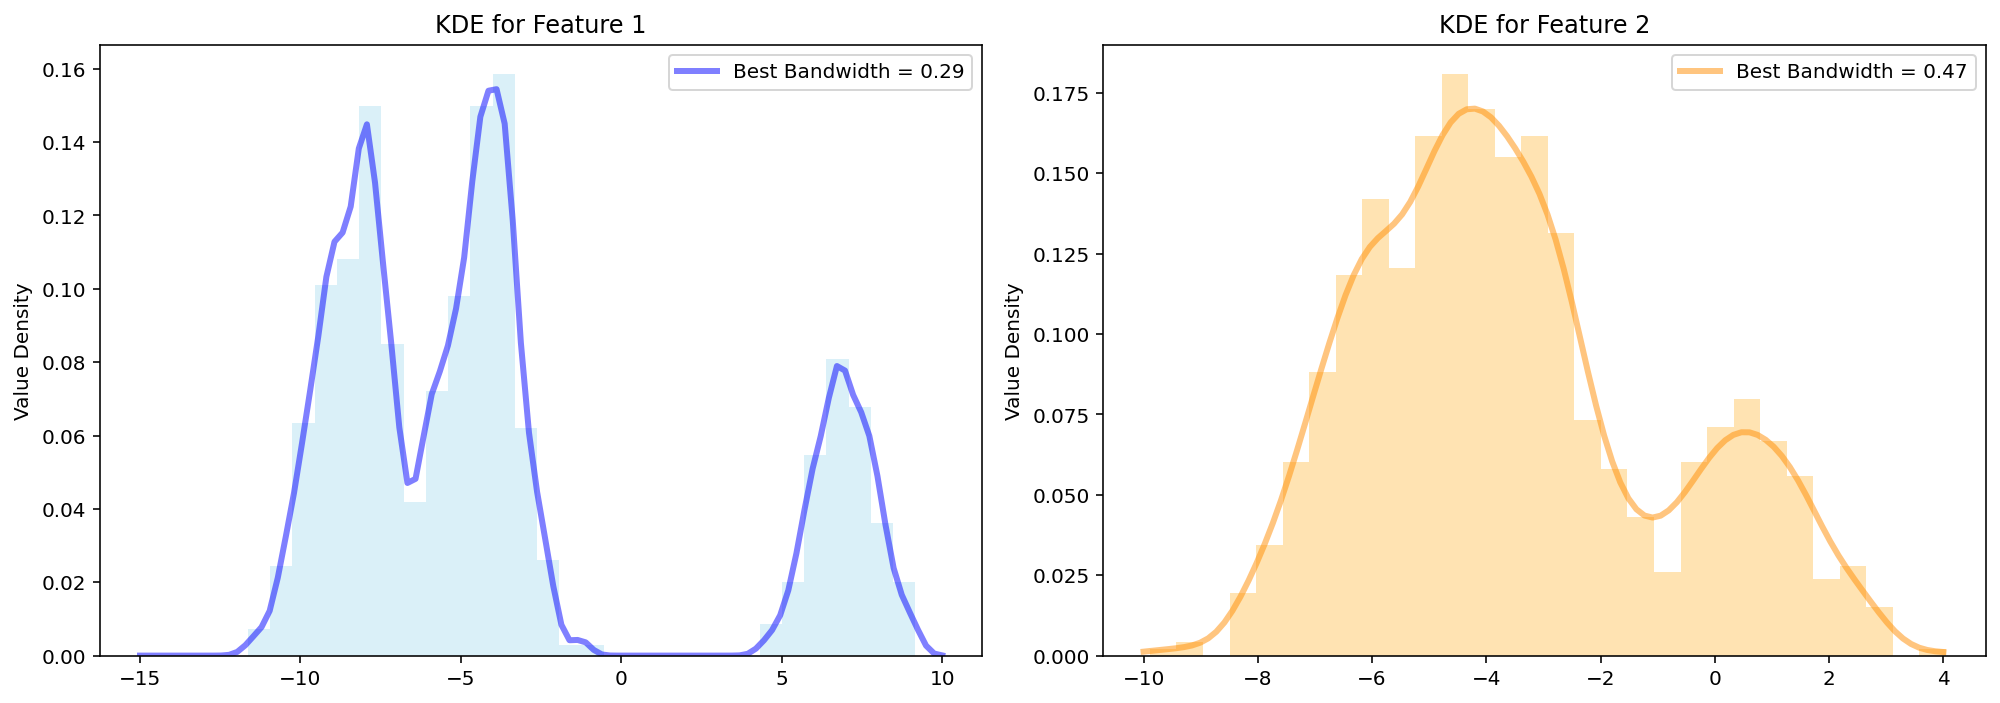

In [270]:
# Step 2
# Perform a grid search 5-fold cross validationt to find best bandwidth
# Code adapted from https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

# Perform grid search
# Test 30 bandwidths between 0.1 and 1.0
# Use default 5-fold splitting strategy
colors = ['skyblue', 'orange', 'blue', 'darkorange']
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)}, cv=5)

# Using best bandwidth, plot 2D kernel density estimate of distribution
x_grid = np.column_stack((np.linspace(-15,10,100), np.linspace(-10, 4, 100)))

fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Repeat process for each of the two features
for i in range(0,2):
    
    # Fit grid to feature
    grid.fit(data[:,i].reshape(-1,1), data[:,2])
    
    # Print best bandwidth for column
    print(f'Best bandwidth for Feature {i+1}:\n', grid.best_params_, '\n')
    
    # Plot 2D KDE for each feature separately
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(x_grid[:,i].reshape(-1,1)))
    
    ax[i].plot(x_grid[:,i], pdf, linewidth=3, alpha=0.5, 
               label=f'Best Bandwidth = {kde.bandwidth:.2f}', color=colors[i+2])
    ax[i].hist(data[:,i], 30, histtype='stepfilled', alpha=0.3, density=True, color=colors[i])
    ax[i].legend(loc='upper right')
    ax[i].set_ylabel('Value Density')
    ax[i].set_title(f'KDE for Feature {i+1}')
    
plt.tight_layout()
plt.show()

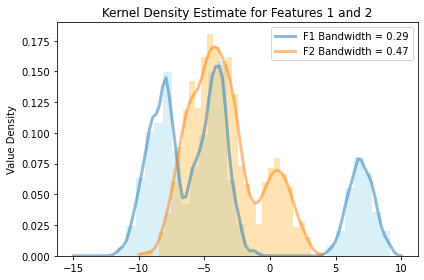

In [192]:
# Plot features together on same plot
for i in range(0,2):
    
    # Fit grid to feature
    grid.fit(data[:,i].reshape(-1,1), data[:,2])
    
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(x_grid[:,i].reshape(-1,1)))
    
    plt.plot(x_grid[:,i], pdf, linewidth=3, alpha=0.5, label=f'F{i+1} Bandwidth = {kde.bandwidth:.2f}')
    plt.hist(data[:,i], 30, histtype='stepfilled', alpha=0.3, density=True, color=colors[i])
    
plt.title('Kernel Density Estimate for Features 1 and 2')
plt.ylabel('Value Density')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

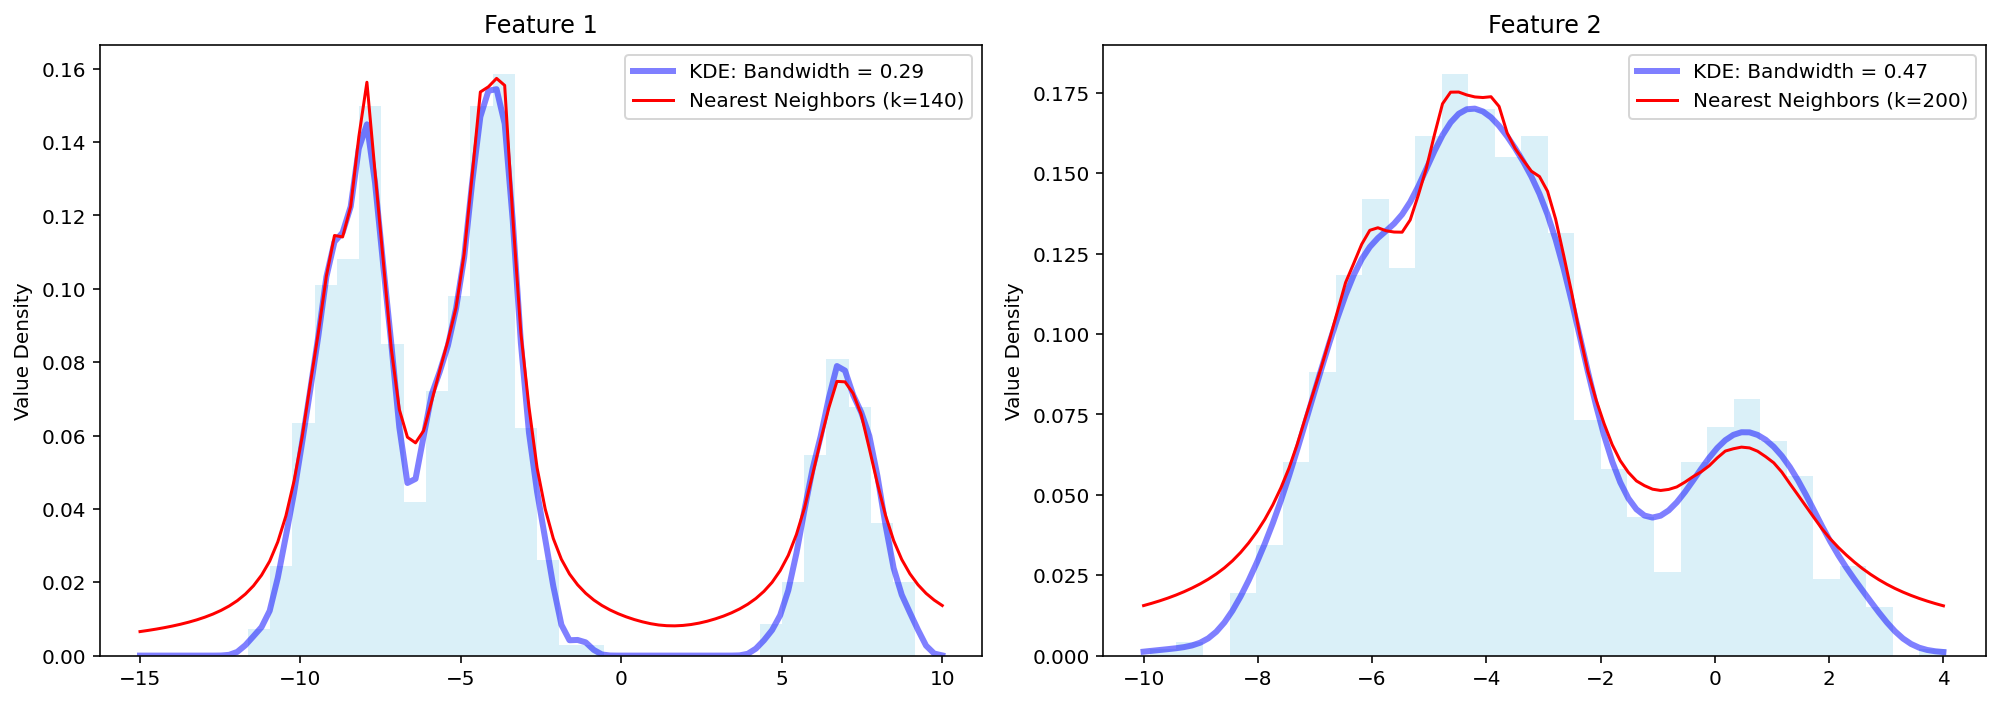

In [269]:
# Step 3
# Nearest Neighbors approach
# Code adapted from https://github.com/VanderbiltAstronomy/astr_8070_s21/blob/main/lectures/Lecture_14.ipynb

k = [140,200] # Number of neighbors
N = 1000 # Number of samples

fig, ax = plt.subplots(1, 2, figsize=(14,5))

# Repeat process for each of the two features
for i in range(0,2):
    
    # Fit KDE grid to feature
    grid.fit(data[:,i].reshape(-1,1), data[:,2])

    # Plot 2D KDE for each feature separately
    kde = grid.best_estimator_
    pdf = np.exp(kde.score_samples(x_grid[:,i].reshape(-1,1)))
    
    # Initialize KNeighborsDensity object
    nbrs = KNeighborsDensity('bayesian', n_neighbors=k[i])
    
    # Fit KNeighborsDensity object to feature
    nbrs.fit(data[:,i].reshape(-1,1))
    dens_nbrs = nbrs.eval(x_grid[:,i].reshape(-1,1)) / N
    
    ax[i].plot(x_grid[:,i], pdf, linewidth=3, alpha=0.5, 
               label=f'KDE: Bandwidth = {kde.bandwidth:.2f}', color='blue')
    ax[i].plot(x_grid[:,i], dens_nbrs, '-', lw=1.5, color='red', 
         zorder=2, label=f'Nearest Neighbors (k={k[i]})')
    ax[i].hist(data[:,i], 30, histtype='stepfilled', alpha=0.3, density=True, color='skyblue')
    ax[i].legend(loc='upper right')
    ax[i].set_ylabel('Value Density')
    ax[i].set_title(f'Feature {i+1}')
    
plt.tight_layout()
plt.show()

To make the nearest neighbors distribution estimate look similar to the KDE distribution, I use 140 neighbors for the first feature and 200 neighbors for the second feature.